<a href="https://colab.research.google.com/github/islam-rabiul/Machine-Learning-Projects/blob/main/spam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [104]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [105]:
data =pd.read_csv("spam.csv",encoding ='latin-1')
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


Drop the unwanted column

In [106]:
data = data.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'])

Rename the useful columns

In [107]:
data.rename(columns={'v1': 'label', 'v2': 'message'}, inplace=True)


Convert label value into numeric value

In [108]:
data['label'] = data['label'].map({'ham': 0, 'spam': 1})

Find the size of the dataset

In [109]:
data.shape

(5572, 2)

Count the number of spams(1) and ham(0)

In [110]:
data['label'].value_counts()

,count
label,
0,4825
1,747


This is a graphical representation of number of spams and ham

<Axes: xlabel='label'>

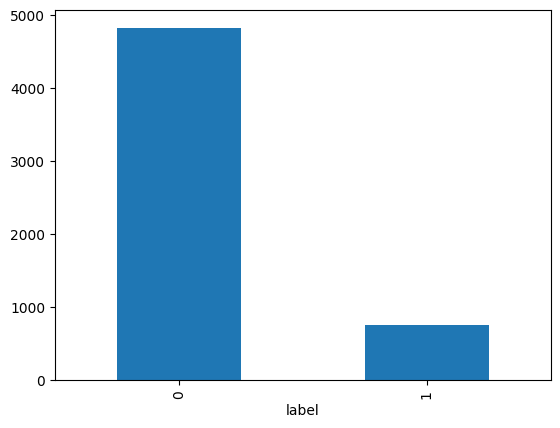

In [111]:
data['label'].value_counts().plot(kind='bar')

This pie chart shows the percentage of number of spams and ham.

Text(0.5, 1.0, 'label distribution')

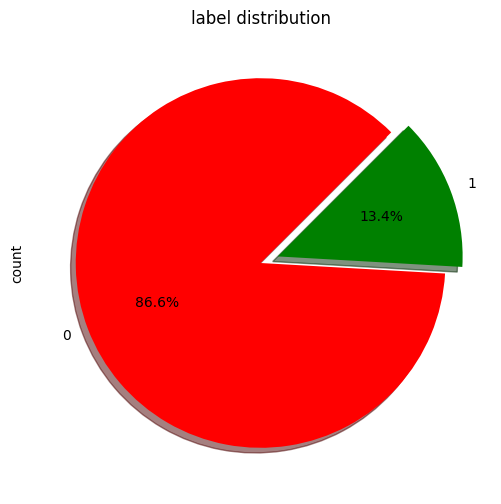

In [112]:
plt.figure(figsize=(10,6))
colors=['red','green']
data['label'].value_counts().plot(kind='pie',autopct='%.1f%%',shadow=True,colors=colors,startangle=45,explode=(0,0.1))
plt.title('label distribution')

import nltk to remove stopwords such as (),{.;?

In [113]:
import re
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.stem.porter import PorterStemmer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [114]:
stopwords_set = set(stopwords.words('english'))
emoji_pattern = re.compile('(?::|;|=)(?:-)?(?:\)|\(|D|P)')

def preprocessing(text):
    text = re.sub('<[^>]*>', '', text)
    emojis = emoji_pattern.findall(text)
    text = re.sub('[\W+]', ' ', text.lower()) + ' '.join(emojis).replace('-', '')

    prter = PorterStemmer()
    text = [prter.stem(word) for word in text.split() if word not in stopwords_set]

    return " ".join(text)

In [115]:
data['message'] = data['message'].apply(lambda x: preprocessing(x))

In [116]:
data['message']

,message
0,go jurong point crazi avail bugi n great world...
1,ok lar joke wif u oni
2,free entri 2 wkli comp win fa cup final tkt 21...
3,u dun say earli hor u c alreadi say
4,nah think goe usf live around though
...,...
5567,2nd time tri 2 contact u u å 750 pound prize 2...
5568,ì_ b go esplanad fr home
5569,piti mood suggest
5570,guy bitch act like interest buy someth els nex...


Convert text into numbers

In [117]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf=TfidfVectorizer(strip_accents=None,lowercase=False,preprocessor=None,use_idf=True,norm='l2',smooth_idf=True)
y=data.label.values
x=tfidf.fit_transform(data.message)

Data preprocessing:
Split the data into training and test data

In [118]:

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x,y,random_state=1,test_size=0.2,shuffle=False)

Apply RandomForestClassifier Model

In [119]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()

clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)


In [120]:
from sklearn import metrics

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.97847533632287


In [121]:
# Confusion matrix
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred))

[[969   1]
 [ 23 122]]


Text(0.5, 1.0, 'Confusion matrix')

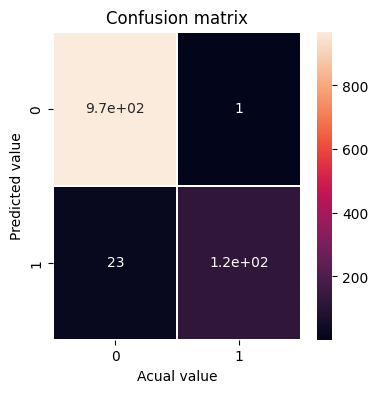

In [125]:
plt.figure(figsize=(4,4))
cm=confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot = True ,linewidth=.2)
plt.xlabel('Acual value')
plt.ylabel('Predicted value')
plt.title('Confusion matrix')


In [122]:

print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[0 0]
 [1 1]
 [0 0]
 ...
 [0 0]
 [0 0]
 [0 0]]


In [123]:
import pickle
pickle.dump(clf,open('clf.pkl','wb'))
pickle.dump(tfidf,open('tfidf.pkl','wb'))
def prediction(message):
    preprocessed_message = preprocessing(message)
    message_list = [preprocessed_message]  # Wrap the preprocessed comment in a list
    message_vector = tfidf.transform(message_list)
    prediction = clf.predict(message_vector)
    return prediction

prediction = prediction('Todays Voda numbers ending 7548 are selected to receive a $350 award. If you have a match please call 08712300220 quoting claim code 4041 standard rates app ')

In [124]:
if prediction == 1:
    print("spam")
else:
    print("ham")

spam
